# PERFORMING EDA AND LINEAR REGRESESION IN MT CARS DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
mydata=sm.datasets.get_rdataset('mtcars').data

In [3]:
# THE DEPENDENT COLUMN IS MPG COLUMN AND REST ARE INDEPENDENT COLUMNS
# WE HAVE DEPENDENT COLUMN  AS NUMERICAL CONTINUOUS VARIBLE
# AND IN INDEPENDENT FEATURE WE HAVE 5 CATEGORICAL AND ORDIANAL VARIBLE REST 5 ARE NUMERICAL AND CONTINOUS VARIABLE
mydata.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
# THERE ARE NO NULL VALUES IN THE DATASET
mydata.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [22]:
mydata['cyl'].unique()

array([6, 4, 8])

In [4]:
for i in mydata.columns:
    print(i,mydata[i].unique())
    

mpg [21.  22.8 21.4 18.7 18.1 14.3 24.4 19.2 17.8 16.4 17.3 15.2 10.4 14.7
 32.4 30.4 33.9 21.5 15.5 13.3 27.3 26.  15.8 19.7 15. ]
cyl [6 4 8]
disp [160.  108.  258.  360.  225.  146.7 140.8 167.6 275.8 472.  460.  440.
  78.7  75.7  71.1 120.1 318.  304.  350.  400.   79.  120.3  95.1 351.
 145.  301.  121. ]
hp [110  93 175 105 245  62  95 123 180 205 215 230  66  52  65  97 150  91
 113 264 335 109]
drat [3.9  3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.07 2.93 3.   3.23 4.08 4.93
 4.22 3.7  3.73 4.43 3.77 3.62 3.54 4.11]
wt [2.62  2.875 2.32  3.215 3.44  3.46  3.57  3.19  3.15  4.07  3.73  3.78
 5.25  5.424 5.345 2.2   1.615 1.835 2.465 3.52  3.435 3.84  3.845 1.935
 2.14  1.513 3.17  2.77  2.78 ]
qsec [16.46 17.02 18.61 19.44 20.22 15.84 20.   22.9  18.3  18.9  17.4  17.6
 18.   17.98 17.82 17.42 19.47 18.52 19.9  20.01 16.87 17.3  15.41 17.05
 16.7  16.9  14.5  15.5  14.6  18.6 ]
vs [0 1]
am [1 0]
gear [4 3 5]
carb [4 1 2 3 6 8]


In [5]:
# THE DATASET HAS 11 COLUMNS AND 32 ROWS AFTER SEEING THE SHAPE 
mydata.shape

(32, 11)

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [7]:
# DESCRIBE GIVES THE FIVE NUMBER SUMMARY OF THE DATASET
mydata.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


# PERFORMING UNIVARIATE ANALYSIS


In [8]:
mydata.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

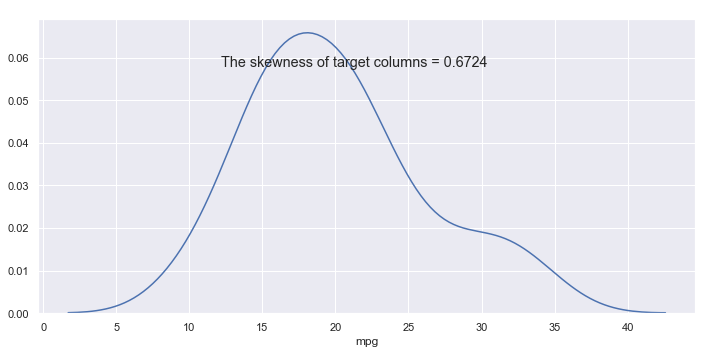

In [49]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))
sns.distplot(mydata.mpg,hist=False)
plt.suptitle(text)
text='\n\n\nThe skewness of target columns = %1.4f'%mydata.skew()[0]
plt.gcf().tight_layout()


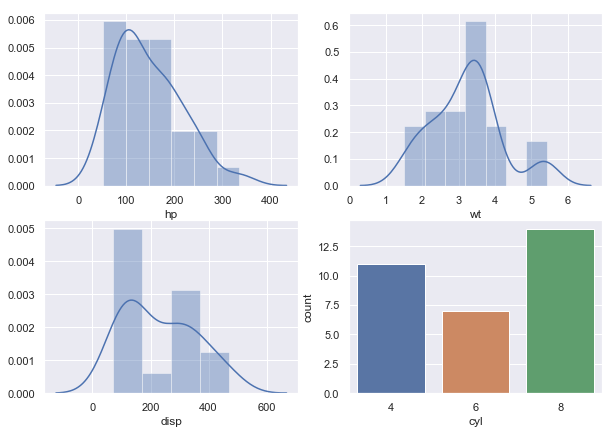

In [121]:

fig,axes=plt.subplots(2,2,figsize=(10,7))
sns.distplot(mydata.hp,ax=axes[0,0],label='horsepower')

sns.distplot(mydata.wt,ax=axes[0,1])
sns.distplot(mydata.disp,ax=axes[1,0])
sns.countplot(mydata.cyl)

Text(0.5, 1.0, 'scatterplot mpg vs wt')

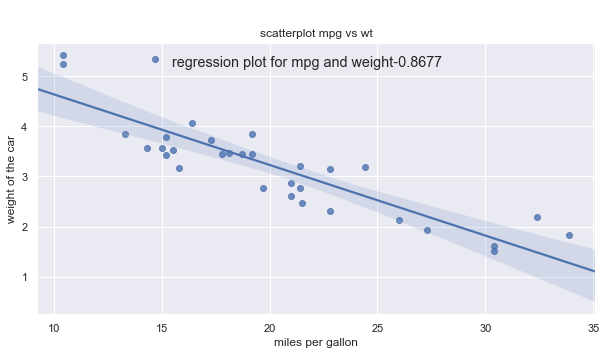

In [85]:
# multivariate analysis
plt.figure(figsize=(10,5))
sns.regplot(mydata.mpg,mydata.wt)
text='\n\n\nregression plot for mpg and weight%1.4f'%np.corrcoef(mydata.wt,mydata.mpg)[0,1]
plt.xlabel('miles per gallon')
plt.ylabel('weight of the car')
plt.suptitle(text)
plt.title('scatterplot mpg vs wt')

In [109]:
# appying lineaar regression
import statsmodels.api as sm
x=mydata.wt
y=mydata.mpg

In [110]:
# adding intercept to our model
x=sm.add_constant(x)

In [113]:
# fitting in the model
model=sm.OLS(y,x).fit()
predictions=model.predict(x)

In [115]:
predictions.head()

Mazda RX4            23.282611
Mazda RX4 Wag        21.919770
Datsun 710           24.885952
Hornet 4 Drive       20.102650
Hornet Sportabout    18.900144
dtype: float64

In [116]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           1.29e-10
Time:                        15:36:10   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### conclusion

####  The coefficent values of the weigth column is -5.3445  through which can interpret that for every unit change in weight value the predicted value drecreses by 5.3445 

* R -squred give us the total variation explained by ot model that is 75%
* Standard error is the standard deviation of the sampling distribution of a statistic such as mean.
* The t scores and p-values for the hypothesis test the wt has statistically significant p-value at 5% level of significance since p-value is less than 5%. 
* There is a 95% confidence intervals for the wt.

** We predict at 95% confidence that the value of wt is between -6.486 and -4.203*

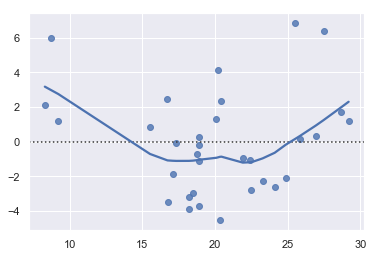

In [124]:
# plotting residuals
# it shows no pattern
sns.residplot(predictions,model.resid,lowess=True)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


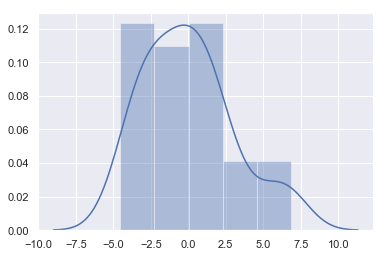

In [126]:
# the residual plot shows normal distribution
sns.distplot(model.resid)